In [1]:
import numpy as np
f = open('resources/InsectWingbeatSound/InsectWingbeatSound_TEST','r')
data = f.read()
f.close()
# 개행문자 기준으로 끊어서 리스트로
data_list = data.split('\n')

# "," 기준으로 끊어서 리스트로
emptylist = []
for list_part in data_list:
    emptylist.append(list_part.split(","))

In [2]:
# str -> float 변환
tofloat = []
for partlist in emptylist:
    tofloat.append([float(i) for i in partlist]) 

In [3]:
labels = []
data_list = []
for datas in tofloat:
    labels.append(datas[0])
    data_list.append(datas[1:])
print(np.shape(labels))
print(np.shape(data_list))


(1980,)
(1980, 256)


In [4]:
from readFile import split_into_values, toRPdata
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

def Standard(data):
    SS = StandardScaler().fit(data)
    scaled = SS.transform(data)
    return scaled

def MinMax(data):
    MMS = MinMaxScaler().fit(data)
    scaled = MMS.transform(data)
    return scaled

# result_list transpose
result_T = [list(x) for x in zip(*data_list)]

# minmax 정규화
result_scaled = Standard(result_T)

# 다시 result transpose 해서 원래대로
result_scaled = [list(x) for x in zip(*result_scaled)]

result_ = np.array(result_scaled)

In [5]:
result_.shape

(1980, 256)

In [6]:
data = result_.reshape(result_.shape[0], 1, result_.shape[1])
X = toRPdata(data, threshold='point', percentage=30)
#X = toRPdata(data)
    
X_scaled = np.expand_dims(X, axis=3)
X_scaled.shape

(1980, 256, 256, 1)

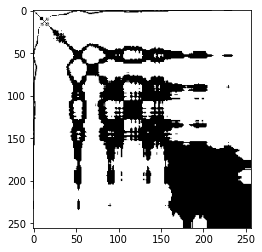

In [7]:
from matplotlib import pyplot as plt
plt.imshow(X[0], cmap='Greys')

In [8]:
learning_rate = 3e-5
optimizer='Adam'
loss='mse'
image_size = 256 #1024, 256
dimension = 8 # ...

In [9]:
from utils import split_data, normalization_tool
from agent import Autoencoder_Agent

X_train, X_test, Y_train, Y_test = split_data(X_scaled, X_scaled) #데이터 분리

autoencoder = Autoencoder_Agent(model_size=image_size, dimension=dimension, optimizer=optimizer,learning_rate=learning_rate)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 128)     1280      
_________________________________________________________________
activation (Activation)      (None, 256, 256, 128)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      73792     
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        1

In [10]:
batch_size = 10
epochs = 5000

In [11]:
hist = autoencoder.train(X_train,batch_size,epochs,X_test)

Epoch 1/5000
149/149 [==============================] - ETA: 0s - loss: 0.6567
Epoch 00001: val_loss improved from inf to 0.62312, saving model to insectWing_dimension_8.h5
149/149 [==============================] - 26s 173ms/step - loss: 0.6567 - val_loss: 0.6231
Epoch 2/5000
149/149 [==============================] - ETA: 0s - loss: 0.6120
Epoch 00002: val_loss improved from 0.62312 to 0.60861, saving model to insectWing_dimension_8.h5
149/149 [==============================] - 24s 164ms/step - loss: 0.6120 - val_loss: 0.6086
Epoch 3/5000
149/149 [==============================] - ETA: 0s - loss: 0.6066
Epoch 00003: val_loss improved from 0.60861 to 0.60690, saving model to insectWing_dimension_8.h5
149/149 [==============================] - 24s 163ms/step - loss: 0.6066 - val_loss: 0.6069
Epoch 4/5000
149/149 [==============================] - ETA: 0s - loss: 0.6046
Epoch 00004: val_loss improved from 0.60690 to 0.60494, saving model to insectWing_dimension_8.h5
149/149 [===========

Epoch 34/5000
149/149 [==============================] - ETA: 0s - loss: 0.5687
Epoch 00034: val_loss did not improve from 0.57927
149/149 [==============================] - 24s 164ms/step - loss: 0.5687 - val_loss: 0.5795
Epoch 35/5000
149/149 [==============================] - ETA: 0s - loss: 0.5685
Epoch 00035: val_loss improved from 0.57927 to 0.57921, saving model to insectWing_dimension_8.h5
149/149 [==============================] - 24s 162ms/step - loss: 0.5685 - val_loss: 0.5792
Epoch 36/5000
149/149 [==============================] - ETA: 0s - loss: 0.5685
Epoch 00036: val_loss improved from 0.57921 to 0.57901, saving model to insectWing_dimension_8.h5
149/149 [==============================] - 24s 162ms/step - loss: 0.5685 - val_loss: 0.5790
Epoch 37/5000
149/149 [==============================] - ETA: 0s - loss: 0.5682
Epoch 00037: val_loss did not improve from 0.57901
149/149 [==============================] - 24s 162ms/step - loss: 0.5682 - val_loss: 0.5800
Epoch 38/5000


Epoch 70/5000
149/149 [==============================] - ETA: 0s - loss: 0.5651
Epoch 00070: val_loss did not improve from 0.57879
149/149 [==============================] - 24s 162ms/step - loss: 0.5651 - val_loss: 0.5789
Epoch 71/5000
149/149 [==============================] - ETA: 0s - loss: 0.5651
Epoch 00071: val_loss did not improve from 0.57879
149/149 [==============================] - 24s 162ms/step - loss: 0.5651 - val_loss: 0.5791
Epoch 72/5000
149/149 [==============================] - ETA: 0s - loss: 0.5649
Epoch 00072: val_loss did not improve from 0.57879
149/149 [==============================] - 24s 162ms/step - loss: 0.5649 - val_loss: 0.5791
Epoch 73/5000
149/149 [==============================] - ETA: 0s - loss: 0.5650
Epoch 00073: val_loss did not improve from 0.57879
149/149 [==============================] - 24s 162ms/step - loss: 0.5650 - val_loss: 0.5792
Epoch 74/5000
149/149 [==============================] - ETA: 0s - loss: 0.5649
Epoch 00074: val_loss did no

Epoch 107/5000
149/149 [==============================] - ETA: 0s - loss: 0.5637
Epoch 00107: val_loss did not improve from 0.57879
149/149 [==============================] - 24s 162ms/step - loss: 0.5637 - val_loss: 0.5790
Epoch 108/5000
149/149 [==============================] - ETA: 0s - loss: 0.5636
Epoch 00108: val_loss did not improve from 0.57879
149/149 [==============================] - 24s 162ms/step - loss: 0.5636 - val_loss: 0.5794
Epoch 109/5000
149/149 [==============================] - ETA: 0s - loss: 0.5636
Epoch 00109: val_loss did not improve from 0.57879
149/149 [==============================] - 24s 162ms/step - loss: 0.5636 - val_loss: 0.5793
Epoch 110/5000
149/149 [==============================] - ETA: 0s - loss: 0.5637
Epoch 00110: val_loss did not improve from 0.57879
149/149 [==============================] - 24s 163ms/step - loss: 0.5637 - val_loss: 0.5791
Epoch 111/5000
149/149 [==============================] - ETA: 0s - loss: 0.5635
Epoch 00111: val_loss d

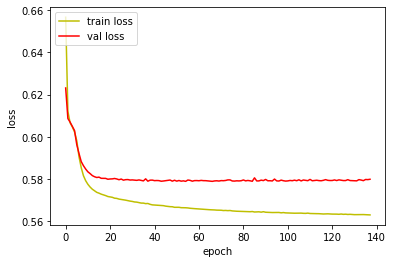

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()


loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
# loss_ax.plot([hist['loss'][i] - hist['val_loss'][i] for i in range(len(hist['loss']))], 'g', label='loss - val loss')


loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

loss_ax.legend(loc='upper left')

plt.show()

In [13]:
features = np.empty((0,8), float)
for i in range(66):
    features = np.append(features, autoencoder.feature_extract(X_scaled[i*30:(i+1)*30]), axis=0)

print(features.shape)

(1980, 8)


In [34]:
from sklearn.cluster import KMeans
result = KMeans(n_clusters=11).fit(features)
plotSilhouette(features,result)

0.1970727484177404


In [17]:
import sys
import numpy

numpy.set_printoptions(threshold=sys.maxsize)
print(result.labels_)

[ 7  2  0  8  4  7  8 10  2  7  1  9  1  8  8  0  8  7  5  2  8  4  1  2
  8  8  0  7  8  8 10  8  7  8 10 10  5  8  8  8  2  7  5  0 10  8 10  7
 10  0  0  8  1  5  4 10 10  8 10  4  1  4 10  1 10  6  3  0  5  8  1  9
 10  7  0 10  6 10  8  2  0  9  8 10  0  7  8 10  4  7  4 10 10  7 10  4
  4  8  4  5  8  7  1  9  7  7  8  4  0  7  4  8  6 10 10  4  7  5  9  8
  8  1  5  4  9 10  2  2 10  0  9  4  9  7  5  8 10  8  7 10  5  8 10  2
  4  2  8  3  4  0  8  7  7 10  5  4  5  8  8  0  8  8  1  0  8  8  9  2
  5  2  1  1  1  7 10  8  4  1  5  4  7  7 10  0 10  5  0  7  6  4  4 10
  5  0  8  7  4  4  8  3  8  2  7  1 10  9  8 10  4  7  1  4  8  7  7  4
  1  8  7  0  4 10  5  1  0  4  9  9  4  2  2  9  8  9  4  4  0  4  7  2
  7  0  1  3  3  4  4  2  8  0  4 10  0 10 10  0  9 10  4  0  7  8  8  1
  0  2  4  9 10  8  3  2 10  1 10  8 10  2  4  8  4  8  8  8 10 10  0 10
  5  9 10  4 10  4  7  4  8 10  8  8  0  0  5  7  0  3  7  7 10  8  8  7
  0  7  0  7 10  4  8  0  8  8  8  0  5  2  7  2 10

In [14]:
import numpy as np
from sklearn.metrics import silhouette_samples,silhouette_score
from matplotlib import cm

def plotSilhouette(X, y_km):
    cluster_labels = np.unique(y_km.labels_)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_score(X, y_km.labels_,metric='euclidean')
    print(silhouette_vals)
#     y_ax_lower, y_ax_upper = 0,0
#     yticks = []
    
#     for i , c in enumerate(cluster_labels):
#         c_silhouette_vals = silhouette_vals[y_km.labels_ == c]
#         c_silhouette_vals.sort()
#         y_ax_upper += len(c_silhouette_vals)
#         color = cm.jet(i/n_clusters)
        
#         plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,edgecolor='none', color=color)
#         yticks.append((y_ax_lower + y_ax_upper)/2)
#         y_ax_lower += len(c_silhouette_vals)
    
#     silhouette_avg = np.mean(silhouette_vals)
#     plt.axvline(silhouette_avg, color='red', linestyle='--')
#     plt.yticks(yticks, cluster_labels+1)
#     plt.ylabel('cluster')
#     plt.xlabel('silhouette score')
#     plt.show()

0.2279039883123083


In [35]:
autoencoder.save("insect_128_8_bce.h5")